In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
spam_df=pd.read_csv('spam.csv', encoding='latin1')

In [5]:
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<Axes: >

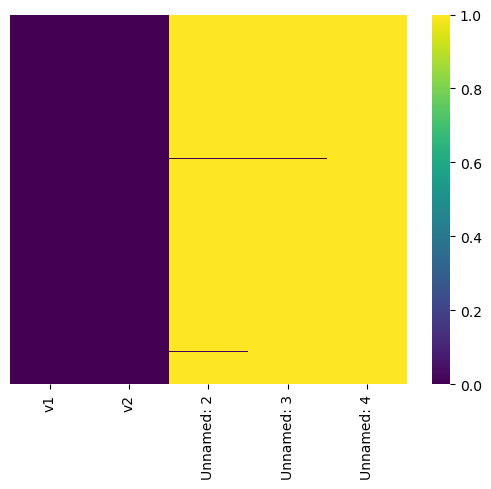

In [6]:
sns.heatmap(spam_df.isnull(), cmap='viridis', yticklabels=False)

In [8]:
spam_df['v1'].value_counts()     

ham     4825
spam     747
Name: v1, dtype: int64

In [9]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
print(spam_df['v2'].iloc[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [11]:
spam_df.shape

(5572, 5)

In [12]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
spam_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [14]:
spam_df.sample(6)

,v1,v2
4588,ham,Have you not finished work yet or something?
5093,ham,Gokila is talking with you aha:)
2763,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
1587,ham,"Dont search love, let love find U. Thats why i..."
3243,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
2961,ham,"\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\"""""


In [15]:
spam_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [16]:
spam_df.sample(3)

,target,text
1256,ham,"Not yet chikku..going to room nw, i'm in bus.."
5376,ham,I don't want you to leave. But i'm barely doin...
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t..."


In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder=LabelEncoder()

In [20]:
spam_df['target']=label_encoder.fit_transform(spam_df['target'])

In [21]:
spam_df.sample(4) #ham =0,   spam =1

,target,text
1510,0,"Pete,is this your phone still? Its Jenny from ..."
4147,1,Please call Amanda with regard to renewing or ...
167,0,"Hi frnd, which is best way to avoid missunders..."
3019,0,I thank you so much for all you do with selfle...


In [22]:
spam_df['target'].loc[433]

0

<Axes: >

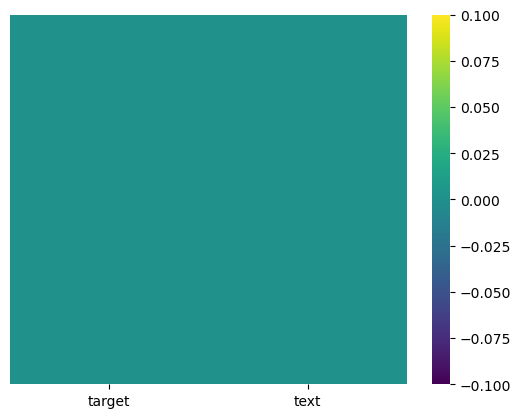

In [23]:
sns.heatmap(spam_df.isnull(), yticklabels=False, cmap='viridis')

In [24]:
spam_df['text'].duplicated().sum()

403

In [25]:
spam_df=spam_df.drop_duplicates(keep='first')

In [26]:
spam_df['text'].duplicated().sum()

0

In [27]:
spam_df.shape

(5169, 2)

In [28]:
# EDA

In [29]:
spam_df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

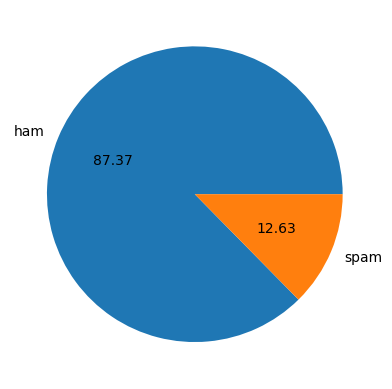

In [30]:
plt.pie(spam_df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [31]:
!pip install nltk

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
spam_df['length']=spam_df['text'].apply(len)

In [35]:
spam_df['length'].idxmax()

1084

In [43]:
spam_df['text'].loc[1084]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [44]:
spam_df.loc[1084]

target                                                    0
text      For me the love should start with attraction.i...
length                                                  910
Name: 1084, dtype: object

In [45]:
spam_df['num_words']=spam_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [46]:
spam_df.sample(4)

,target,text,length,num_words
4116,0,Sure thing big man. i have hockey elections at...,94,20
5143,0,Hi darlin im on helens fone im gonna b up the ...,88,21
4380,0,Mathews or tait or edwards or anderson,38,7
1429,1,For sale - arsenal dartboard. Good condition b...,71,14


In [47]:
spam_df.rename(columns={'length':'character_length'}, inplace=True)

In [48]:
spam_df.head()

,target,text,character_length,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [49]:
spam_df['num_sentences']=spam_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [50]:
spam_df.describe()

,target,character_length,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [51]:
# Ham messages analysis
spam_df[spam_df['target']==0][['character_length', 'num_words', 'num_sentences']].describe()

,character_length,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [52]:
spam_df[spam_df['target']==1][['character_length', 'num_words', 'num_sentences']].describe()

,character_length,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


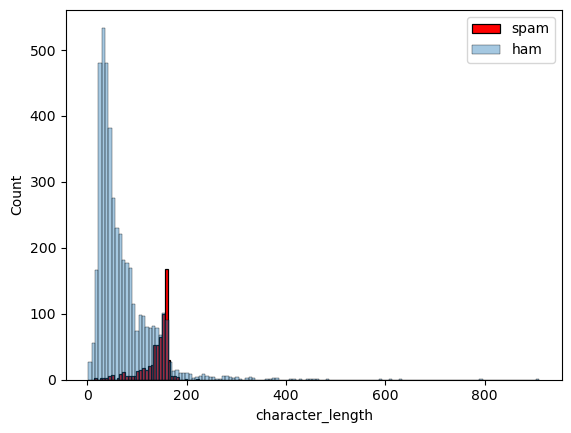

In [53]:
fig, ax=plt.subplots()

sns.histplot(spam_df[spam_df['target']==1]['character_length'], color='red', alpha=1, label='spam',ax=ax)
sns.histplot(spam_df[spam_df['target']==0]['character_length'], alpha=0.4, label='ham', ax=ax)
ax.legend()
plt.show()

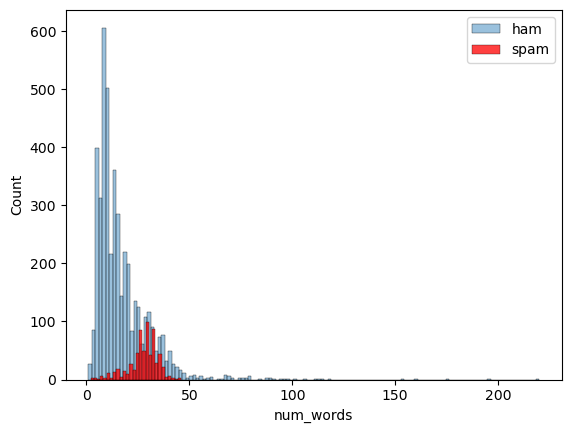

In [54]:
fig, ax=plt.subplots()
sns.histplot(spam_df[spam_df['target']==0]['num_words'], label='ham', ax=ax, alpha=0.45)
sns.histplot(spam_df[spam_df['target']==1]['num_words'], label='spam', ax=ax, color='red')
ax.legend()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_2036\691559945.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam_df.corr(), cmap='viridis', annot=True)


<Axes: >

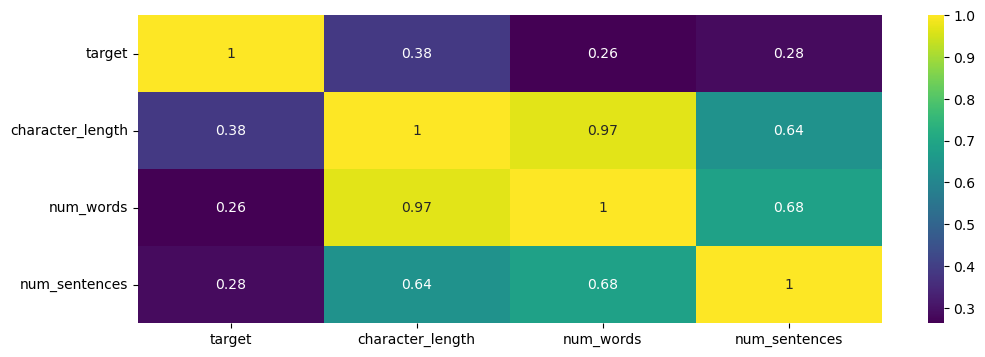

In [55]:
plt.figure(figsize=(12,4))
sns.heatmap(spam_df.corr(), cmap='viridis', annot=True)

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [59]:
# preprocessing
def text_preprocessing(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [60]:
spam_df['transformed_text']=spam_df['text'].apply(text_preprocessing)

In [61]:
!pip install wordcloud

In [62]:
from wordcloud import WordCloud

In [63]:
wc=WordCloud(height=530, width=540, min_font_size=12, background_color='black')

In [64]:
ham_word_cloud=wc.generate(spam_df[spam_df['target']==0]['transformed_text'].str.cat(sep=' '))

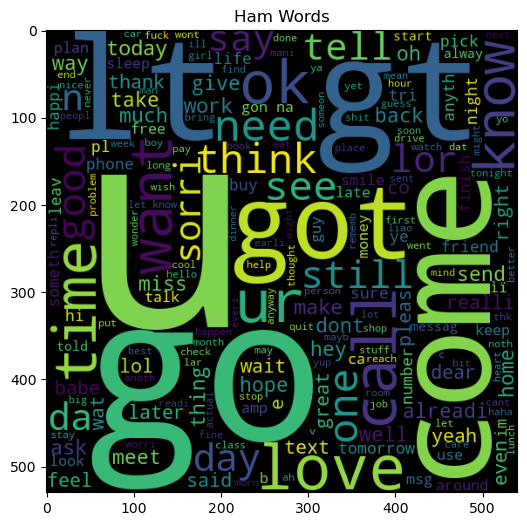

In [67]:
plt.figure(figsize=(18,6))
plt.imshow(ham_word_cloud)
plt.title('Ham Words')
plt.show()

In [68]:
spam_word_cloud=wc.generate(spam_df[spam_df['target']==1]['transformed_text'].str.cat(sep=' '))

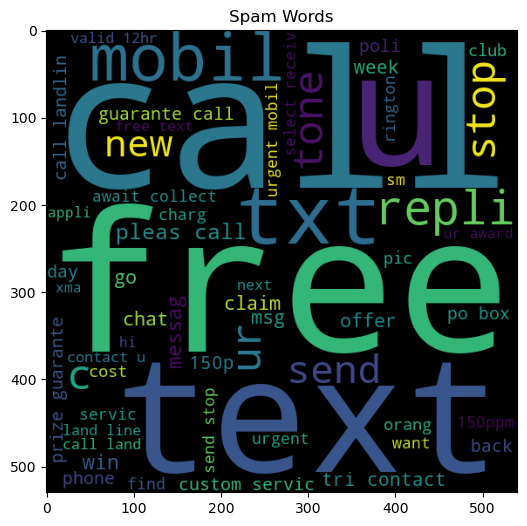

In [71]:
plt.figure(figsize=(18,6))
plt.imshow(spam_word_cloud)
plt.title('Spam Words')
plt.show()

In [78]:
ham_corpus=[]
for sent in spam_df[spam_df['target']==0]['transformed_text'].tolist():
    for word in sent.split():
        ham_corpus.append(word)
    

In [79]:
from collections import Counter

In [80]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

In [86]:
spam_corpus=[]
for sent in spam_df[spam_df['target']==1]['transformed_text'].tolist():
    for word in sent.split():
        spam_corpus.append(word)

In [87]:
most_common_items = Counter(spam_corpus).most_common(30)
spam_most_common_items = pd.DataFrame(most_common_items, columns=['Element', 'Count'])

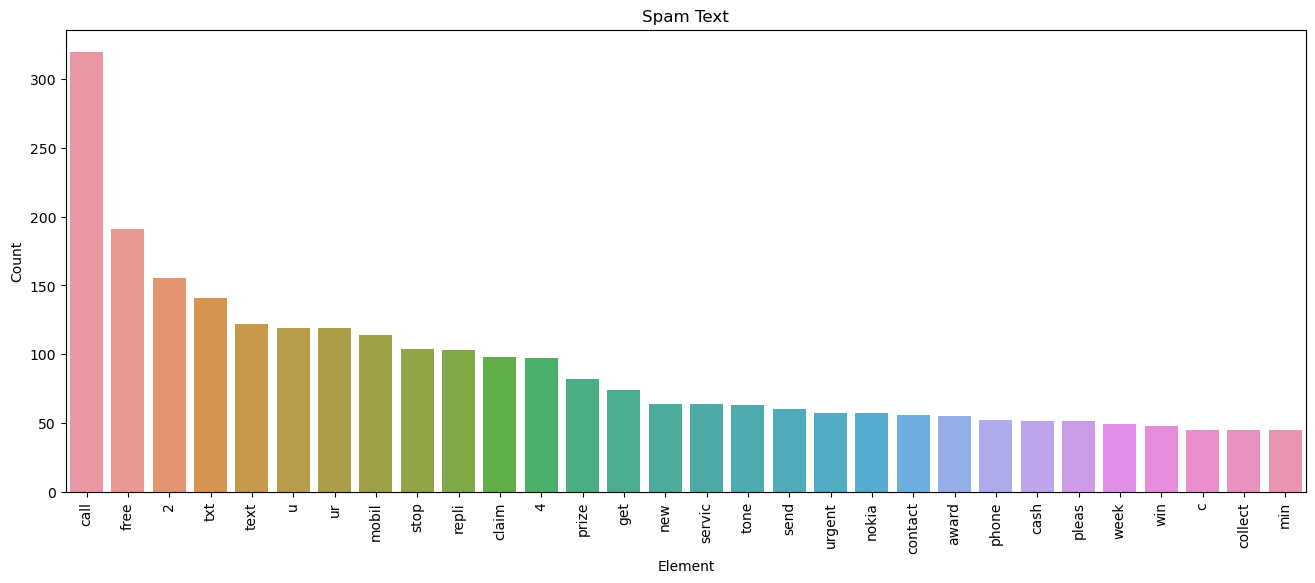

In [89]:
plt.figure(figsize=(16,6))
sns.barplot(data=spam_most_common_items, x='Element', y='Count')
plt.xticks(rotation='vertical')
plt.title('Spam Text')
plt.show()

In [90]:
most_common_word_ham=Counter(ham_corpus).most_common(30)
ham_most_common=pd.DataFrame(most_common_word_ham, columns=['Word', 'Count'])

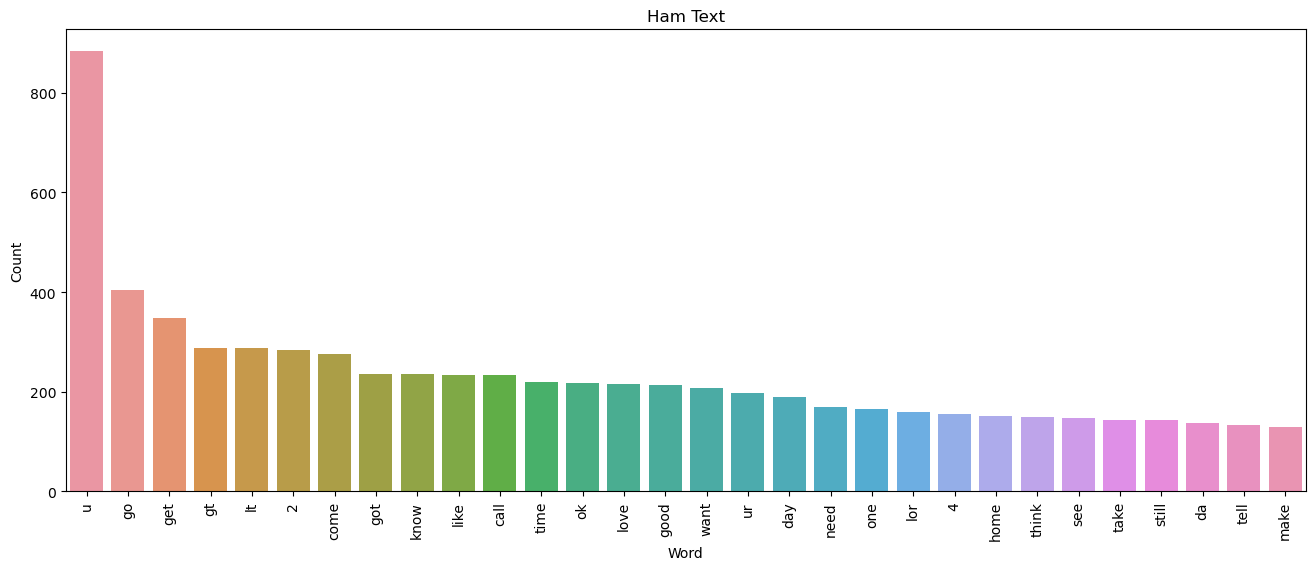

In [91]:
plt.figure(figsize=(16,6))
sns.barplot(x=ham_most_common['Word'], y=ham_most_common['Count'])
plt.xticks(rotation='vertical')
plt.title('Ham Text')
plt.show()

In [92]:
# Model

In [95]:
spam_df.sample(6)

,target,text,character_length,num_words,num_sentences,transformed_text
213,0,Yup... How Ì_ noe leh...,24,7,1,yup noe leh
3552,0,Din i tell u jus now 420,24,7,1,din tell u ju 420
2453,0,How much she payed. Suganya.,28,7,2,much pay suganya
178,0,Text her. If she doesnt reply let me know so i...,66,17,2,text doesnt repli let know log
2704,1,FreeMsg: Fancy a flirt? Reply DATE now & join ...,156,34,4,freemsg fanci flirt repli date join uk fastest...
978,0,Hey you can pay. With salary de. Only &lt;#&g...,50,18,3,hey pay salari de lt gt


In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
cv=CountVectorizer()

In [102]:
x=cv.fit_transform(spam_df['transformed_text']).toarray()

In [104]:
y=spam_df['target']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [109]:
gnb=GaussianNB()
mnb=MultinomialNB()

In [110]:
gnb.fit(x_train, y_train)

GaussianNB()

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [122]:
gnb_prediction=gnb.predict(x_test)
print('**GaussianNB Prediction**')
print('\n')
print('Accuracy Score\n',accuracy_score(y_test, gnb_prediction))
print('\n')
print('Confusion Matrix\n', confusion_matrix(y_test, gnb_prediction))
print('\n')
print('Precision Score', precision_score(y_test, gnb_prediction))

**GaussianNB Prediction**


Accuracy Score
 0.8684719535783365


Confusion Matrix
 [[772 117]
 [ 19 126]]


Precision Score 0.5185185185185185


In [116]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [117]:
mnb_prediction=mnb.predict(x_test)

In [125]:
print('**MultiNomialNB Prediction**\n')
print('Accuracy Score\n', accuracy_score(y_test, mnb_prediction))
print('\n')
print('Confusion Matrix\n', confusion_matrix(y_test, mnb_prediction))
print('\n')
print('Precision Score\n', precision_score(y_test, mnb_prediction))

**MultiNomialNB Prediction**

Accuracy Score
 0.9738878143133463


Confusion Matrix
 [[872  17]
 [ 10 135]]


Precision Score
 0.8881578947368421


In [126]:
from sklearn.naive_bayes import BernoulliNB

In [127]:
bnb=BernoulliNB()

In [128]:
bnb.fit(x_train, y_train)

BernoulliNB()

In [129]:
bnb_prediction=bnb.predict(x_test)

In [132]:
print('**Bernoulli NB Prediction**\n')
print('Accuracy Score\n', accuracy_score(y_test, bnb_prediction))
print('\n')
print('Confusion Matrix\n', confusion_matrix(y_test, bnb_prediction))
print('\n')
print('Precision Score\n', precision_score(y_test, bnb_prediction))

**Bernoulli NB Prediction**

Accuracy Score
 0.9661508704061895


Confusion Matrix
 [[885   4]
 [ 31 114]]


Precision Score
 0.9661016949152542


In [133]:
# tfidf

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [135]:
tfidf=TfidfVectorizer()

In [138]:
tfidf_x=tfidf.fit_transform(spam_df['transformed_text']).toarray()

In [140]:
X_train, X_test, y_train,y_test=train_test_split(tfidf_x, y, test_size=0.23, random_state=41)

In [141]:
gnb.fit(X_train, y_train)

GaussianNB()

In [142]:
tfidf_gnb_prediction=gnb.predict(X_test)

In [148]:
print('**Gaussian NB Prediction Using TFIDF**\n')
print('Accuracy\n', accuracy_score(y_test, tfidf_gnb_prediction))
print('\n')
print('Confusion Matrix\n', confusion_matrix(y_test, tfidf_gnb_prediction))
print('\n')
print('Precision\n', precision_score(y_test, tfidf_gnb_prediction))

**Gaussian NB Prediction Using TFIDF**

Accuracy
 0.8662741799831791


Confusion Matrix
 [[914 126]
 [ 33 116]]


Precision
 0.4793388429752066


In [144]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [145]:
tfidf_mnb_prediction=mnb.predict(X_test)

In [147]:
print('**Multinomial NB Prediction using TFIDF**\n')
print('Accuracy\n', accuracy_score(y_test, tfidf_mnb_prediction))
print('\n')
print('Confusion\n', confusion_matrix(y_test, tfidf_mnb_prediction))
print('\n')
print('Precision\n', precision_score(y_test, tfidf_mnb_prediction))

**Multinomial NB Prediction using TFIDF**

Accuracy
 0.9562657695542472


Confusion
 [[1040    0]
 [  52   97]]


Precision
 1.0


In [149]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [150]:
tfidf_bnb_prediction=bnb.predict(X_test)

In [151]:
print('BNB Prediction using TFIDF')
print('Accuracy\n', accuracy_score(y_test, tfidf_bnb_prediction))
print('\n')
print('Confusion\n', confusion_matrix(y_test, tfidf_bnb_prediction))
print('\n')
print('Precision\n', precision_score(y_test, tfidf_bnb_prediction))

BNB Prediction using TFIDF
Accuracy
 0.9739276703111859


Confusion
 [[1039    1]
 [  30  119]]


Precision
 0.9916666666666667


# MNB using TFIDF is performing great on our data

In [155]:
!pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.1/99.8 MB 1.1 MB/s eta 0:01:28
                                              0.2/99.8 MB 1.2 MB/s eta 0:01:20
                                              0.4/99.8 MB 2.0 MB/s eta 0:00:51
                                              0.8/99.8 MB 2.9 MB/s eta 0:00:34
                                              1.3/99.8 MB 3.7 MB/s eta 0:00:27
                                              1.6/99.8 MB 4.1 MB/s eta 0:00:24
                                              2.0/99.8 MB 4.3 MB/s eta 0:00:23
                                              2.5/99.8 MB 4.6 MB/s eta 0:00:22
     -                                        2.7/99.8 MB 4.7 MB/s eta 0:00:21
     -                                        3.1/99.8 MB 4.5 MB/s eta 0:00:22
     -                                        3.5/99.8 MB 4.8 MB/s

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [168]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dt=DecisionTreeClassifier(max_depth=7)
lr=LogisticRegression(solver='liblinear', penalty='l1')
rf=RandomForestClassifier(n_estimators=50, random_state=3)
ab=AdaBoostClassifier(n_estimators=50, random_state=3)
bc=BaggingClassifier(n_estimators=52, random_state=2)
et=ExtraTreesClassifier(n_estimators=49, random_state=4)
gb=GradientBoostingClassifier(n_estimators=50, random_state=3)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [169]:
classifiers={
    'Support Vector':svc,
    'K Neighbors':knc,
    'Multinomial':mnb,
    'Decision Tree':dt,
    'Logistic Regression':lr,
    'Random Forest':rf,
    'Ada Boost':ab,
    'Bagging ClS':bc,
    'Extra Tree':et,
    'Gradient Boost':gb,
    'XGB':xgb
}

In [170]:
def classifier_training(clf, x_train,y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    prediction=clf.predict(x_test)
    accuracy=accuracy_score(y_test, prediction)
    precision=precision_score(y_test, prediction)
    
    return accuracy, precision

In [165]:
classifier_training(svc, X_train,y_train, X_test, y_test)

Accuracy 0.9705634987384356
Precision 0.9523809523809523


(None, None)

In [171]:
accuracy=[]
precision=[]
for name, clf in classifiers.items():
    
    current_accuracy, current_precision=classifier_training(clf, X_train, y_train, X_test, y_test)
    print('for', name)
    print('Accuracy -->', current_accuracy)
    print('Precision -->', current_precision)
    
    accuracy.append(current_accuracy)
    precision.append(current_precision)

for Support Vector
Accuracy --> 0.9705634987384356
Precision --> 0.9523809523809523
for K Neighbors
Accuracy --> 0.9024390243902439
Precision --> 1.0
for Multinomial
Accuracy --> 0.9562657695542472
Precision --> 1.0
for Decision Tree
Accuracy --> 0.9444911690496215
Precision --> 0.8487394957983193
for Logistic Regression
Accuracy --> 0.9486963835155593
Precision --> 0.8928571428571429
for Random Forest
Accuracy --> 0.9663582842724979
Precision --> 0.990990990990991
for Ada Boost
Accuracy --> 0.9663582842724979
Precision --> 0.9097744360902256
for Bagging ClS
Accuracy --> 0.9646761984861227
Precision --> 0.8794326241134752
for Extra Tree
Accuracy --> 0.9697224558452481
Precision --> 0.9747899159663865
for Gradient Boost
Accuracy --> 0.9537426408746846
Precision --> 0.9433962264150944
for XGB
Accuracy --> 0.9714045416316233
Precision --> 0.952755905511811


In [173]:
multi_model_performance=pd.DataFrame({'Algo':classifiers.keys(),'Accuracy':accuracy, 'Precision':precision})

In [179]:
multi_model_performance.sort_values('Precision', ascending=False)

,Algo,Accuracy,Precision
1,K Neighbors,0.902439,1.000000
2,Multinomial,0.956266,1.000000
5,Random Forest,0.966358,0.990991
8,Extra Tree,0.969722,0.974790
10,XGB,0.971405,0.952756
0,Support Vector,0.970563,0.952381
9,Gradient Boost,0.953743,0.943396
6,Ada Boost,0.966358,0.909774
4,Logistic Regression,0.948696,0.892857
7,Bagging ClS,0.964676,0.879433
